In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset

df = pd.read_csv("../data/cleaned_dataset.csv")

In [3]:
df

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,outdoor_humidity,hour,day,month,weekday
0,-0.474183,0.0,-0.346578,1.945579,0.475459,1.193806,-1.277275,2.318207,1.164231,2.228763,...,-1.534699,2.264467,-1.745813,1.339283,-0.282139,0.906548,-1.332422,-0.466190,-1.710022,-1.065871
1,-0.474183,0.0,-0.381506,2.094206,0.410244,1.227278,-1.251821,2.307904,0.995683,1.994869,...,-1.534699,2.463758,-1.745813,1.429751,-0.273387,0.906548,-1.332422,-0.466190,-1.710022,-1.065871
2,-0.474183,0.0,0.031279,2.138478,0.337783,1.266835,-1.309093,2.282146,0.761729,1.953594,...,-1.591521,2.567886,-1.687953,1.517585,-0.286514,0.906548,-1.188183,-0.466190,-1.710022,-1.065871
3,-0.474183,0.0,-0.562497,2.138478,0.265322,1.237421,-1.251821,-0.130506,0.542868,1.953594,...,-1.591521,2.554095,-1.659023,1.622107,-0.321520,0.906548,-1.188183,-0.466190,-1.710022,-1.065871
4,-0.893262,0.0,-0.657755,2.138478,0.265322,1.257707,-1.251821,-0.130506,0.437211,1.953594,...,-1.591521,2.546509,-1.659023,1.666023,-0.339023,0.906548,-1.188183,-0.466190,-1.710022,-1.065871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,-0.474183,0.0,2.412732,-0.521003,1.540636,-0.388494,2.031802,-0.130506,2.479911,-0.438660,...,1.306410,0.159842,2.120272,0.548781,1.761315,-1.582762,-1.043944,-1.017405,1.800348,0.961755
4407,-0.474183,0.0,2.380979,-0.549464,1.497160,-0.388494,2.031802,-0.236972,2.454755,-0.448119,...,1.249588,-0.106245,2.120272,0.548781,1.542530,-1.261561,-0.899704,-1.017405,1.800348,0.961755
4408,-0.893262,0.0,2.380979,-0.539977,1.448852,-0.395594,2.031802,-0.224379,2.454755,-0.429201,...,1.249588,0.133638,2.120272,0.548781,1.525027,0.277529,-0.899704,-1.017405,1.800348,0.961755
4409,-0.055104,0.0,0.031279,-0.066688,1.448852,-0.022334,2.031802,-0.199194,2.454755,-0.438660,...,1.249588,0.104675,2.120272,0.577766,1.516276,-1.301711,-0.899704,-1.017405,1.800348,0.961755


In [4]:
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  4411 non-null   float64
 1   lighting_energy               4411 non-null   float64
 2   zone1_temperature             4411 non-null   float64
 3   zone1_humidity                4411 non-null   float64
 4   zone2_temperature             4411 non-null   float64
 5   zone2_humidity                4411 non-null   float64
 6   zone3_temperature             4411 non-null   float64
 7   zone3_humidity                4411 non-null   float64
 8   zone4_temperature             4411 non-null   float64
 9   zone4_humidity                4411 non-null   float64
 10  zone5_temperature             4411 non-null   float64
 11  zone5_humidity                4411 non-null   float64
 12  zone6_temperature             4411 non-n

## This ensures the data is clean, consistent, and ready for machine learning models.

In [5]:
print("Dataset Description:\n")
df.describe().T

Dataset Description:



,count,mean,std,min,25%,50%,75%,max
equipment_energy_consumption,4411.0,0.000000e+00,1.000113,-2.150498,-0.474183,-0.055104,0.363974,3.716604
lighting_energy,4411.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zone1_temperature,4411.0,2.886630e-15,1.000113,-2.794712,-0.562497,0.031279,0.675859,2.800115
zone1_humidity,4411.0,1.288674e-17,1.000113,-2.492161,-0.730768,-0.066688,0.652205,3.224196
zone2_temperature,4411.0,2.577348e-17,1.000113,-2.488197,-0.676671,-0.024522,0.627627,2.968119
zone2_humidity,4411.0,1.172694e-15,1.000113,-2.809616,-0.681625,-0.022334,0.743713,2.667577
zone3_temperature,4411.0,0.000000e+00,1.000113,-2.931814,-0.801277,0.038720,0.725990,2.971071
zone3_humidity,4411.0,1.804144e-15,1.000113,-2.070931,-0.683441,-0.168284,0.417278,2.799020
zone4_temperature,4411.0,1.649503e-15,1.000113,-3.036888,-0.639483,-0.043276,0.688775,2.598146
zone4_humidity,4411.0,-2.319614e-16,1.000113,-1.961551,-0.798960,-0.061162,0.556361,2.940764


# Normalized data helps many ML models perform better and Zero variance features provide no learning value.

In [6]:
# Step 5.1: Create interaction features


df['avg_temp'] = df[[col for col in df.columns if 'temperature' in col]].mean(axis=1)
df['avg_humidity'] = df[[col for col in df.columns if 'humidity' in col]].mean(axis=1)
df['temp_humidity_interaction'] = df['avg_temp'] * df['avg_humidity']

In [7]:
df

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,outdoor_humidity,hour,day,month,weekday,avg_temp,avg_humidity,temp_humidity_interaction
0,-0.474183,0.0,-0.346578,1.945579,0.475459,1.193806,-1.277275,2.318207,1.164231,2.228763,...,1.339283,-0.282139,0.906548,-1.332422,-0.466190,-1.710022,-1.065871,-0.422737,1.610511,-0.680822
1,-0.474183,0.0,-0.381506,2.094206,0.410244,1.227278,-1.251821,2.307904,0.995683,1.994869,...,1.429751,-0.273387,0.906548,-1.332422,-0.466190,-1.710022,-1.065871,-0.593778,1.638625,-0.972980
2,-0.474183,0.0,0.031279,2.138478,0.337783,1.266835,-1.309093,2.282146,0.761729,1.953594,...,1.517585,-0.286514,0.906548,-1.188183,-0.466190,-1.710022,-1.065871,-0.548271,1.662619,-0.911566
3,-0.474183,0.0,-0.562497,2.138478,0.265322,1.237421,-1.251821,-0.130506,0.542868,1.953594,...,1.622107,-0.321520,0.906548,-1.188183,-0.466190,-1.710022,-1.065871,-0.678216,1.433191,-0.972013
4,-0.893262,0.0,-0.657755,2.138478,0.265322,1.257707,-1.251821,-0.130506,0.437211,1.953594,...,1.666023,-0.339023,0.906548,-1.188183,-0.466190,-1.710022,-1.065871,-0.700058,1.438732,-1.007196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,-0.474183,0.0,2.412732,-0.521003,1.540636,-0.388494,2.031802,-0.130506,2.479911,-0.438660,...,0.548781,1.761315,-1.582762,-1.043944,-1.017405,1.800348,0.961755,1.844071,-0.385978,-0.711770
4407,-0.474183,0.0,2.380979,-0.549464,1.497160,-0.388494,2.031802,-0.236972,2.454755,-0.448119,...,0.548781,1.542530,-1.261561,-0.899704,-1.017405,1.800348,0.961755,1.807934,-0.406323,-0.734605
4408,-0.893262,0.0,2.380979,-0.539977,1.448852,-0.395594,2.031802,-0.224379,2.454755,-0.429201,...,0.548781,1.525027,0.277529,-0.899704,-1.017405,1.800348,0.961755,1.797663,-0.228783,-0.411275
4409,-0.055104,0.0,0.031279,-0.066688,1.448852,-0.022334,2.031802,-0.199194,2.454755,-0.438660,...,0.577766,1.516276,-1.301711,-0.899704,-1.017405,1.800348,0.961755,1.562057,-0.302431,-0.472415


# Created interaction features (avg_temp, avg_humidity, temp_humidity_interaction) to capture non-linear relationships between temperature, humidity, and energy usage, reduce noise through aggregation, and model their combined influence on energy consumption.

In [8]:
# Step 5.2: Statistical aggregates (mean, max, min, std) of zone temperature


zone_temp_cols = [col for col in df.columns if 'temperature' in col and 'zone' in col]
df['zone_temp_mean'] = df[zone_temp_cols].mean(axis=1)
df['zone_temp_max'] = df[zone_temp_cols].max(axis=1)
df['zone_temp_min'] = df[zone_temp_cols].min(axis=1)
df['zone_temp_std'] = df[zone_temp_cols].std(axis=1)

In [9]:
df

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,day,month,weekday,avg_temp,avg_humidity,temp_humidity_interaction,zone_temp_mean,zone_temp_max,zone_temp_min,zone_temp_std
0,-0.474183,0.0,-0.346578,1.945579,0.475459,1.193806,-1.277275,2.318207,1.164231,2.228763,...,-0.466190,-1.710022,-1.065871,-0.422737,1.610511,-0.680822,-0.438359,1.164231,-1.745813,0.948265
1,-0.474183,0.0,-0.381506,2.094206,0.410244,1.227278,-1.251821,2.307904,0.995683,1.994869,...,-0.466190,-1.710022,-1.065871,-0.593778,1.638625,-0.972980,-0.629377,0.995683,-1.745813,0.946381
2,-0.474183,0.0,0.031279,2.138478,0.337783,1.266835,-1.309093,2.282146,0.761729,1.953594,...,-0.466190,-1.710022,-1.065871,-0.548271,1.662619,-0.911566,-0.577355,0.761729,-1.687953,0.937810
3,-0.474183,0.0,-0.562497,2.138478,0.265322,1.237421,-1.251821,-0.130506,0.542868,1.953594,...,-0.466190,-1.710022,-1.065871,-0.678216,1.433191,-0.972013,-0.717849,0.542868,-1.659023,0.807757
4,-0.893262,0.0,-0.657755,2.138478,0.265322,1.257707,-1.251821,-0.130506,0.437211,1.953594,...,-0.466190,-1.710022,-1.065871,-0.700058,1.438732,-1.007196,-0.740173,0.437211,-1.659023,0.785773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,-0.474183,0.0,2.412732,-0.521003,1.540636,-0.388494,2.031802,-0.130506,2.479911,-0.438660,...,-1.017405,1.800348,0.961755,1.844071,-0.385978,-0.711770,1.853266,2.479911,0.995368,0.500872
4407,-0.474183,0.0,2.380979,-0.549464,1.497160,-0.388494,2.031802,-0.236972,2.454755,-0.448119,...,-1.017405,1.800348,0.961755,1.807934,-0.406323,-0.734605,1.837423,2.454755,1.009994,0.501108
4408,-0.893262,0.0,2.380979,-0.539977,1.448852,-0.395594,2.031802,-0.224379,2.454755,-0.429201,...,-1.017405,1.800348,0.961755,1.797663,-0.228783,-0.411275,1.827956,2.454755,0.973096,0.513042
4409,-0.055104,0.0,0.031279,-0.066688,1.448852,-0.022334,2.031802,-0.199194,2.454755,-0.438660,...,-1.017405,1.800348,0.961755,1.562057,-0.302431,-0.472415,1.567144,2.454755,0.031279,0.742599


# Extracted statistical features (mean, max, min, std) from 9 zone temperature columns to summarize overall thermal conditions, reduce feature dimensionality, and help the model learn temperature patterns more effectively.

In [10]:
# Step 5.5: Feature Importance via Random Forest


X = df.drop(columns=['equipment_energy_consumption'])
y = df['equipment_energy_consumption']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- Feature Importances ---\n")
print(importances)


--- Feature Importances ---

hour                         0.239674
zone8_temperature            0.113606
zone1_humidity               0.030678
zone6_humidity               0.029416
zone5_humidity               0.027404
zone9_humidity               0.027144
zone9_temperature            0.027110
zone2_humidity               0.026993
zone_temp_std                0.025958
outdoor_humidity             0.024819
zone7_temperature            0.024615
zone4_temperature            0.024525
zone3_temperature            0.024213
zone8_humidity               0.023829
zone4_humidity               0.023226
zone_temp_mean               0.023192
temp_humidity_interaction    0.022475
zone3_humidity               0.022444
zone5_temperature            0.022356
zone2_temperature            0.022296
zone6_temperature            0.022156
day                          0.021759
zone7_humidity               0.020860
zone_temp_max                0.020700
zone1_temperature            0.019915
outdoor_temperature 

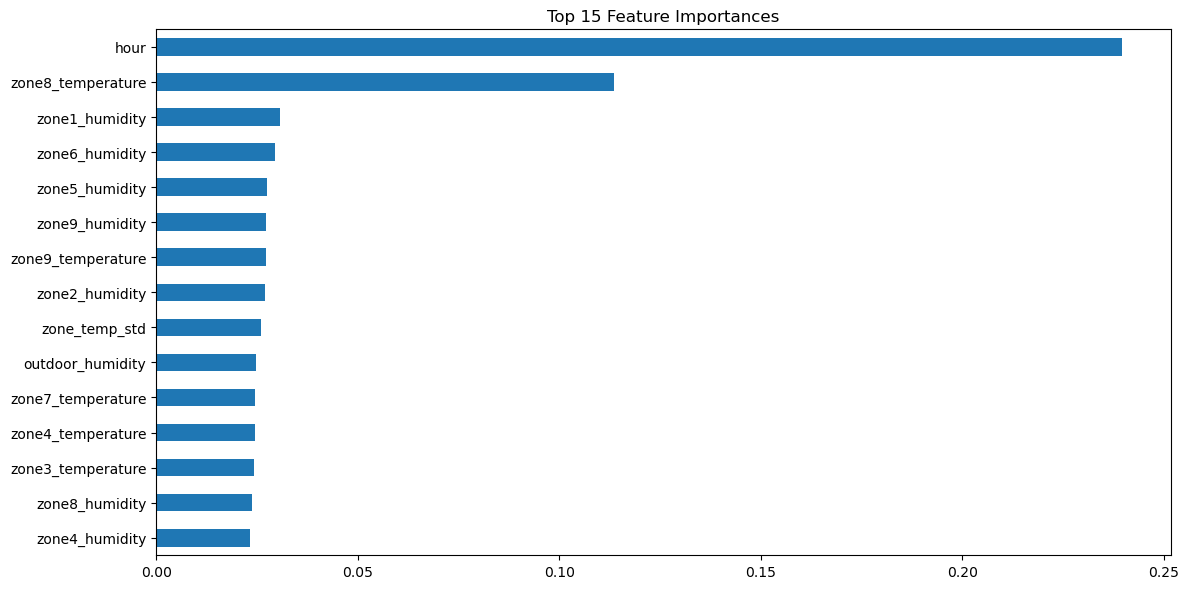

In [11]:
# Plot Feature Importance


plt.figure(figsize=(12, 6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Trained a Random Forest Regressor and analyzed top 15 feature importances to identify the most influential variables driving energy consumption, aiding in effective feature selection and model simplification.

In [12]:
df = df.drop(columns=['lighting_energy'])

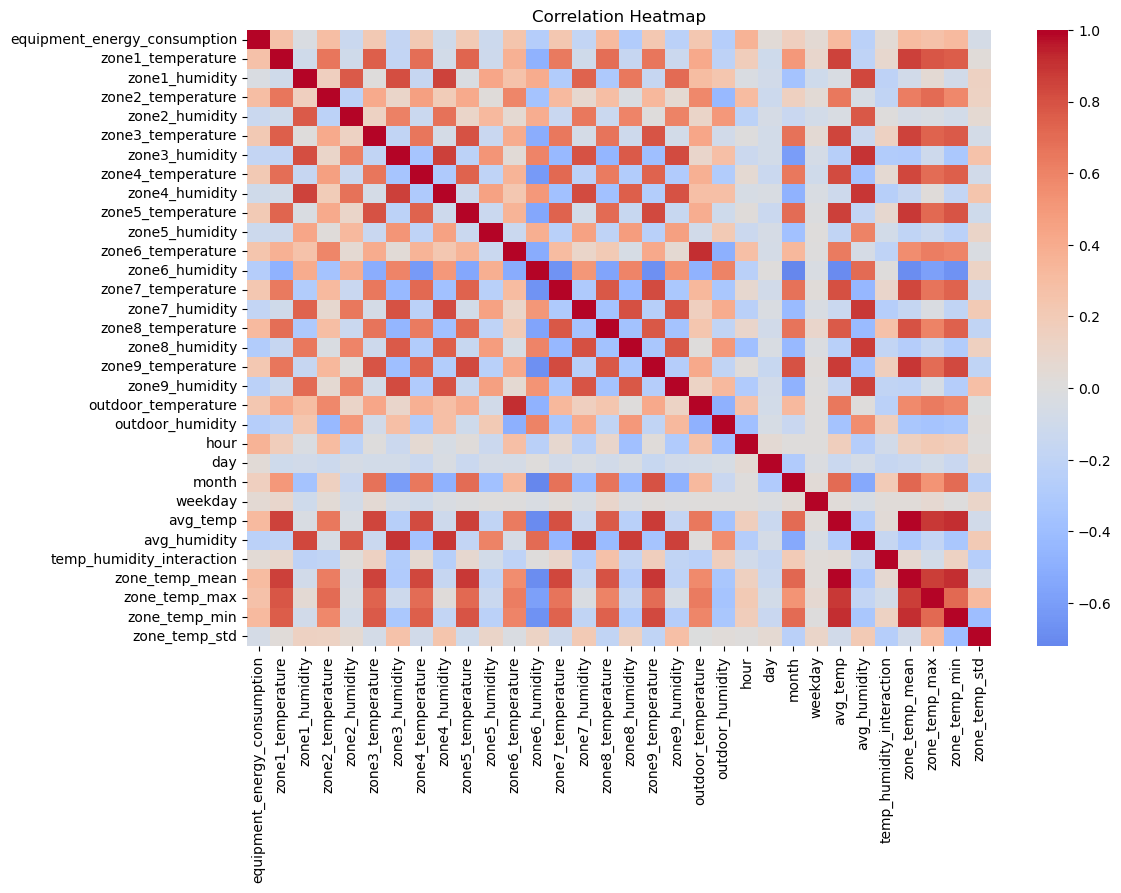

In [13]:
# Check multicollinearity among top features.

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Identified which features are strongly related to energy consumption — temperature-related features showed high positive correlation, while humidity and time-based features had weaker links, helping guide feature selection.

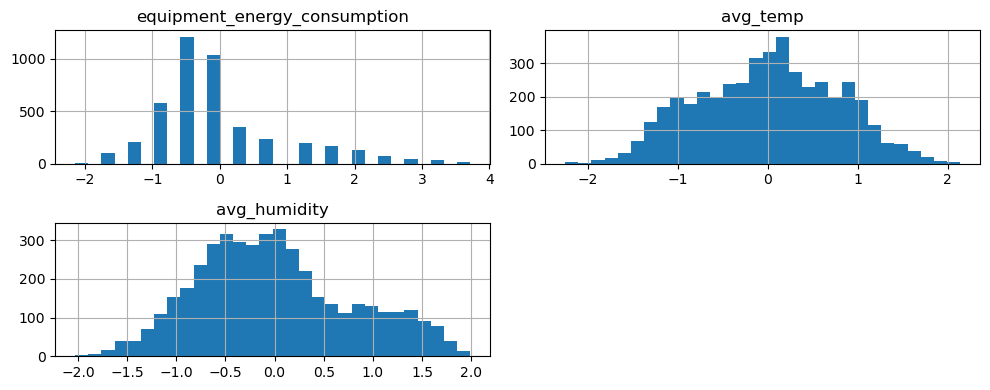

In [14]:
# Check Feature Distributions

df[['equipment_energy_consumption', 'avg_temp', 'avg_humidity']].hist(bins=30, figsize=(10, 4))
plt.tight_layout()
plt.show()

# Checked that key features are normally distributed after scaling, which supports better performance for many machine learning models like linear regression or SVM.

In [16]:
df.to_csv("../data/processed_data.csv", index=False)